In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [68]:
df = pd.read_csv("C:/Users/tobia/Documents/Python Scripts/Data/Stable Isotopes.csv")
df

,X,Amount,Ampl28,Ampl44,C,C_N_RATIO,d13C_original,d15N,Length,Mat,...,d13C_corrected,d13C,NameLatin,TL,d15N_corrected,Group2,Community,Species2,d15N_baseline,TL2
0,215,0.2030,2404.0,8458.0,46.475397,3.878120,-20.786267,4.940686,16.5,4.0,...,-20.786267,-20.786267,Doryteuthis gahi,2.790449,11.487528,Doryteuthis SSC,Doryteuthis,LOL SSC,5.178138,2.855703
1,441,0.4070,2510.0,7764.0,45.329254,3.898183,-20.479687,5.170067,20.5,5.0,...,-20.479687,-20.479687,Doryteuthis gahi,2.814872,11.570564,Doryteuthis SSC,Doryteuthis,LOL SSC,2.290082,3.729554
2,978,0.3790,4073.0,7311.0,45.799266,4.163036,-20.208461,5.276475,14.5,5.0,...,-20.208461,-20.208461,Doryteuthis gahi,2.826201,11.609084,Doryteuthis SSC,Doryteuthis,LOL SSC,2.290082,3.740883
3,419,0.3775,4235.0,7308.0,46.071423,3.984158,-20.379495,5.346744,14.5,5.0,...,-20.379495,-20.379495,Doryteuthis gahi,2.833683,11.634521,Doryteuthis SSC,Doryteuthis,LOL SSC,2.290082,3.748364
4,980,0.4605,2772.0,7963.0,46.238711,4.098427,-19.176182,5.360798,20.5,5.0,...,-19.176182,-19.176182,Doryteuthis gahi,2.835179,11.639609,Doryteuthis SSC,Doryteuthis,LOL SSC,2.290082,3.749861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,1069,0.2720,3560.0,7024.0,44.516596,3.172321,-16.789468,17.406495,76.0,4.0,...,-16.789468,-16.789468,Salilota australis,4.531322,17.406495,Fish,Fish,BAC,2.290082,5.446004
1285,932,0.3695,5093.0,9726.0,44.724744,3.153132,-17.307871,17.610532,NaN,NaN,...,-17.307871,-17.307871,Genypterus blacodes,4.591333,17.610532,Kingclip,Fish,KIN,5.524930,4.554589
1286,930,0.2235,3463.0,9614.0,46.714251,3.102934,-16.091955,17.768912,76.0,8.0,...,-16.091955,-16.091955,Merluccius hubbsi,4.637915,17.768912,Hake,Fish,HAK,5.524930,4.601171
1287,363,0.2605,4068.0,5516.0,47.939446,3.176776,-16.413386,18.027491,64.0,7.0,...,-16.413386,-16.413386,Merluccius hubbsi,4.713968,18.027491,Hake,Fish,HAK,4.925087,4.853648


In [39]:
df.columns

Index(['X', 'Amount', 'Ampl28', 'Ampl44', 'C', 'C_N_RATIO', 'd13C_original',
       'd15N', 'Length', 'Mat', 'N', 'Note', 'Piece', 'Sample', 'Ser_no',
       'Sex', 'SI_ID', 'Species', 'Callsign', 'Station', 'Type', 'Weight',
       'Area', 'Day', 'Daytime', 'Depth', 'Latitude', 'Longitude', 'Month',
       'Obcode', 'PosixDate', 'Season', 'Season_Year', 'Sunrise', 'Sunset',
       'Time', 'XDate', 'Year', 'Cohort', 'Group', 'd13C_corrected', 'd13C',
       'NameLatin', 'TL', 'd15N_corrected', 'Group2', 'Community', 'Species2',
       'd15N_baseline', 'TL2'],
      dtype='object')

In [79]:
df = df[["NameLatin", "Length", "Weight", "Sex", "Community", "d13C",  "d15N", "Latitude", "Longitude"]]
df = df[~df["Latitude"].isna() | ~df["Longitude"].isna()]
df.to_csv( "Stable Isotope df.csv", index=False)
df

,NameLatin,Length,Weight,Sex,Community,d13C,d15N,Latitude,Longitude
0,Doryteuthis gahi,16.5,84.3,F,Doryteuthis,-20.786267,4.940686,-50.566667,-62.683333
1,Doryteuthis gahi,20.5,104.9,M,Doryteuthis,-20.479687,5.170067,-52.953333,-59.446667
2,Doryteuthis gahi,14.5,54.1,M,Doryteuthis,-20.208461,5.276475,-52.953333,-59.446667
3,Doryteuthis gahi,14.5,54.1,M,Doryteuthis,-20.379495,5.346744,-52.953333,-59.446667
4,Doryteuthis gahi,20.5,104.9,M,Doryteuthis,-19.176182,5.360798,-52.953333,-59.446667
...,...,...,...,...,...,...,...,...,...
1284,Salilota australis,76.0,4590.0,F,Fish,-16.789468,17.406495,-52.546667,-58.286667
1285,Genypterus blacodes,NaN,NaN,NaN,Fish,-17.307871,17.610532,-45.961833,-60.116500
1286,Merluccius hubbsi,76.0,2682.0,F,Fish,-16.091955,17.768912,-45.961833,-60.116500
1287,Merluccius hubbsi,64.0,NaN,F,Fish,-16.413386,18.027491,-46.583333,-60.483333


In [81]:
df[df["Longitude"].isna()]

,NameLatin,Length,Weight,Sex,Community,d13C,d15N,Latitude,Longitude


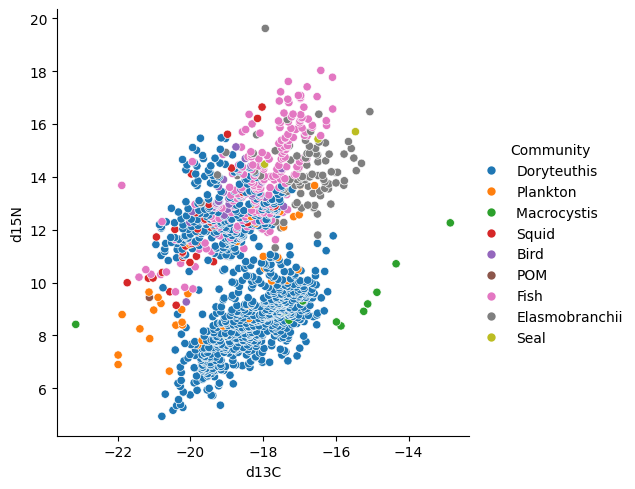

In [7]:
sns.relplot(df, x="d13C", y="d15N", hue = "Community")

C:\Users\tobia\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1883: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
C:\Users\tobia\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1889: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


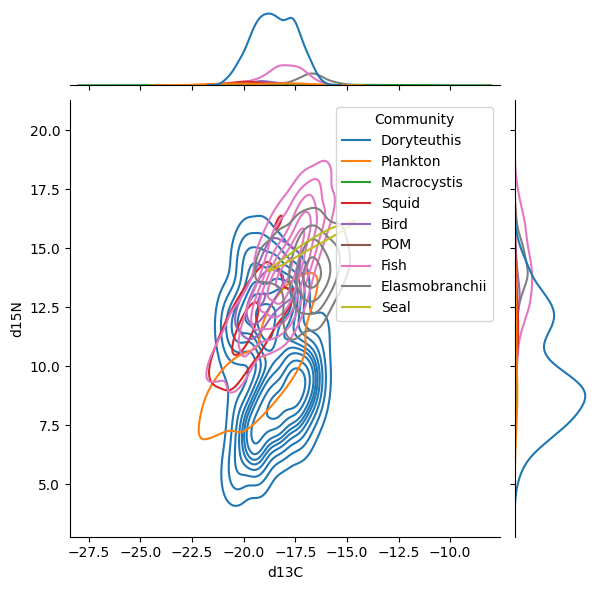

In [8]:
g = sns.jointplot(
    data=df,
    x="d13C", y="d15N", hue="Community",
    kind="kde",
)
g

In [20]:
df_summary1 = df.groupby(['Community'])[["d13C", "d15N"]].mean()
df_summary2 = df.groupby(['Community'])[["d13C", "d15N"]].std()

df_summary = pd.merge(df_summary1, df_summary2, on="Community")
df_summary.columns = ["d13C_mean", "d15N_mean", "d13C_sd", "d15N_sd"]
df_summary

,d13C_mean,d15N_mean,d13C_sd,d15N_sd
Community,,,,
Bird,-18.890638,13.090124,0.690363,1.078082
Doryteuthis,-18.501712,9.788621,1.006215,2.225299
Elasmobranchii,-16.828906,14.151411,0.837960,1.161088
Fish,-18.131565,13.949325,1.051124,1.751144
Macrocystis,-16.507264,9.236638,2.650947,1.187681
POM,-21.130000,9.440000,NaN,NaN
Plankton,-19.191910,10.071270,1.645762,2.029461
Seal,-16.636667,15.206667,1.256437,0.644696
Squid,-19.650689,12.076535,0.980338,1.731112


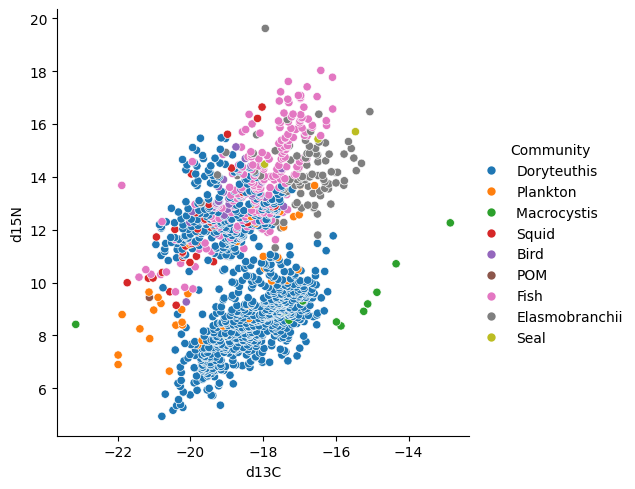

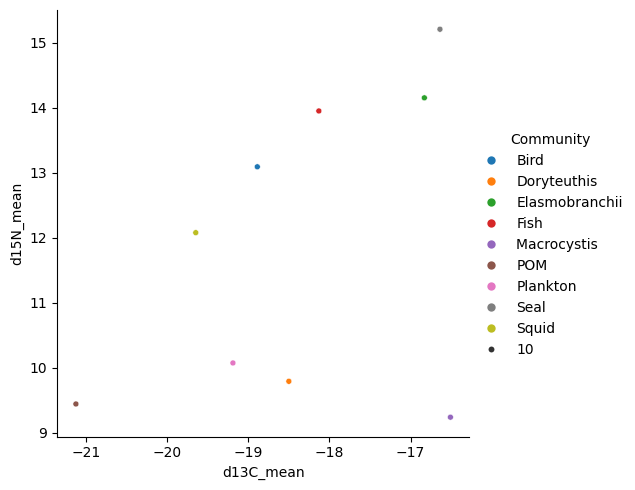

In [21]:
sns.relplot(df, x="d13C", y="d15N", hue = "Community")
sns.relplot(df_summary, x="d13C_mean", y="d15N_mean", hue = "Community", size= 10)

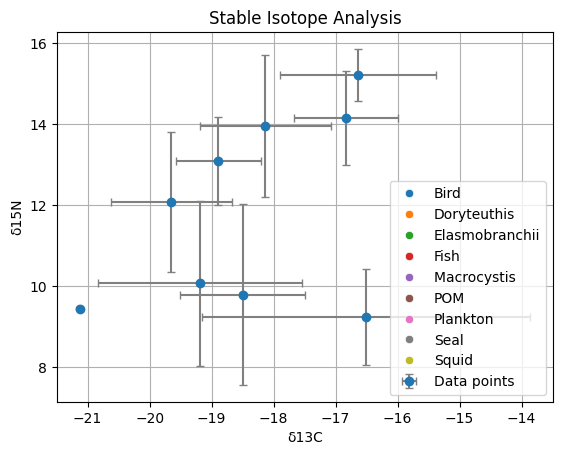

In [34]:
# Plot with error bars
x = df_summary["d13C_mean"]
y = df_summary["d15N_mean"]
x_err = df_summary["d13C_sd"]
y_err = df_summary["d15N_sd"]

sns.scatterplot(x="d13C_mean",y="d15N_mean", hue="Community", data = df_summary)
plt.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o', ecolor='gray', capsize=3, label='Data points')
# Customize plot
plt.xlabel("δ13C")
plt.ylabel("δ15N")
plt.title("Stable Isotope Analysis")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

<Axes: xlabel='Longitude', ylabel='Latitude'>

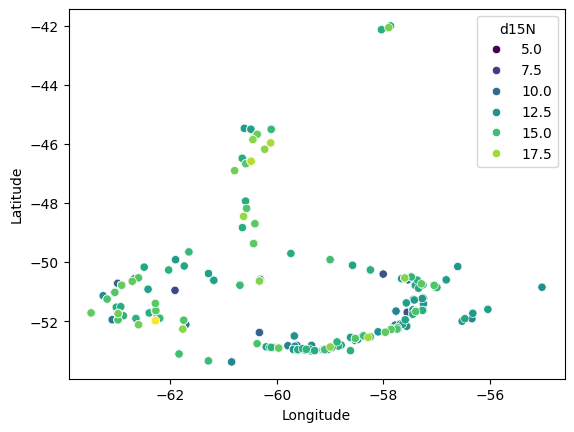

In [43]:
sns.scatterplot(data=df, y="Latitude",x="Longitude", hue="d15N", palette = "viridis")

In [82]:
import folium
map_center = [-51.7, -59.0]
sampling_map = folium.Map(location=map_center, zoom_start=8)

for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"Length: {row['Length']} mm\nWeight: {row['Weight']} g\nSex: {row['Sex']}"
    ).add_to(sampling_map)


sampling_map